### Discovering Static and Dynamic Pinch 
(DISCLAIMER: data obtained is solely for internal equipment validation use, strictly not to circulate)

### Part I: Static

#### 1. What is in the data

##### Import data


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [46]:
df = pd.read_excel("C:/Users/lijing.soh/OneDrive - Nanyang Technological University/Desktop/New area/Statistics.xlsx",
                   index_col=0)

In [47]:
df.head()

,SN001,SN002,SN003,SN004,SN005,SN006,SN007,SN008,SN009,SN010,SN011,SN012,SN013,SN014,SN015,SN016,SN017,SN018,SN019,SN020,SN021,SN022,SN023,SN024,SN025,SN026,SN027,SN028,SN029,SN030,SN031,SN032,SN033,SN034,SN035,SN036,SN037,SN038,SN039,SN040,SN041,SN042,SN043,SN044,SN045,SN046,SN047,SN048,SN049,SN050,SN051,SN052,SN053,SN054,SN055,SN056,SN057,SN058,SN059,SN060,SN061,SN062,SN063,SN064,SN065,SN066,SN067,SN068,SN069,SN070,SN071,SN072,SN073,SN074,SN075,SN076,SN077,SN078,SN079,SN080,SN081,SN082,SN083,SN084,SN085,SN086,SN087,SN088,SN089,SN090,SN091,SN092,SN093,SN094,SN095,SN096,SN097,SN098,SN099,SN100,SN101,SN102,SN103,SN104,SN105,SN106,SN107,SN108,SN109,SN110,SN111,SN112,SN113,SN114,SN115,SN116,SN117,SN118,SN119,SN120,SN121,SN122,SN123,SN124,SN125,SN126,SN127,SN128,SN129,SN130,SN131,SN132,SN133,SN134,SN135,SN136,SN137,SN138,SN139,SN140,SN141,SN142,SN143,SN144,SN145,SN146,SN147,SN148,SN149,SN150,SN151,SN152,SN153,SN154,SN155,SN156,SN157,SN158,SN159,SN160,SN161,SN162,SN163,SN164,SN165,SN166,SN167,SN168,SN169,SN170,SN171,SN172,SN173,SN174,SN175,SN176,SN177,SN178,SN179,SN180,SN181,SN182,SN183,SN184,SN185,SN186,SN187,SN188,SN189,SN190,SN191,SN192,SN193,SN194,SN195,SN196,SN197,SN198,SN199,SN200,SN201,SN202,SN203,SN204,SN205,SN206,SN207,SN208,SN209,SN210,SN211,SN212,SN213,SN214,SN215,SN216,SN217,SN218,SN219,SN220,SN221,SN222,SN223,SN224,SN225,SN226,SN227,SN228,SN229,SN230,SN231,SN232,SN233,SN234,SN235,SN236,SN237,SN238,SN239,SN240,SN241,SN242,SN243,SN244,SN245,SN246,SN247,SN248,SN249,SN250,SN251,SN252,SN253,SN254,SN255,SN256,SN257,SN258,SN259,SN260,SN261,SN262,SN263,SN264,SN265,SN266,SN267,SN268,SN269,SN270,SN271,SN272,SN273,SN274,SN275,SN276,SN277,SN278,SN279,SN280,SN281,SN282,SN283,SN284,SN285,SN286,SN287,SN288,SN289,SN290,SN291,SN292,SN293,SN294,SN295,SN296,SN297,SN298,SN299,SN300,SN301,SN302,SN303,SN304,SN305,SN306,SN307,SN308,SN309,SN310,SN311,SN312,SN313,SN314,SN315,SN316,SN317,SN318,SN319,SN320,SN321,SN322,SN323,SN324,SN325,SN326,SN327,SN328,SN329,SN330,SN331,SN332,SN333,SN334,SN335,SN336,SN337,SN338,SN339,SN340,SN341,SN342,SN343,SN344,SN345,SN346,SN347,SN348,SN349,SN350,SN351,SN352,SN353,SN354,SN355,SN356,SN357,SN358,SN359,SN360,SN361,SN362,SN363,SN364,SN365,SN366,SN367,SN368,SN369,SN370,SN371,SN372,SN373,SN374,SN375,SN376,SN377,SN378,SN379,SN380,SN381,SN382,SN383,SN384,SN385,SN386,SN387,SN388,SN389,SN390,SN391,SN392,SN393,SN394,SN395
Subject Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gender,Female,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Male,Female,Male,Male,Male,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female,Male,Male,Male,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female,Male,Female,Female,Male,Male,Male,Female,Female,Male,Male,Male,Male,Female,Male,Female,Female,Male,Female,Female,Female,Male,Female,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female,Male,Female,Female,Male,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male,Female,Female,Male,Female,Female,Female,Female,Male,Male,Female,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male,Male,Female,Female,Male,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Male,Female,Male,Male,Female,Male,Female,Male,Male,Female,Female,Male,Male,Female,Male,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female,Female,male,Male,Female,Female,Female,Female,Female,Male,Male,Male,Male,Female,Female

In [48]:
# transpose
df = df.transpose()

In [49]:
# reset row index
df.reset_index(inplace=True)
df = df.rename_axis(None, axis=1)

In [50]:
# update column name
df = df.rename(columns = {"index":"Subject Number"})

In [51]:
# display all columns
pd.set_option('display.max_columns', None)

df.head()

,Subject Number,Gender,Age (at last birthday),Race,Do you have any past/current injuries,Dominant Hand (self-declared),Weight,Height,Waist Circumference (cm),Hip Circumference (cm),"Hand Grip (Right, Average)","Hand Grip (Left, Average)","Lateral Pinch (Right, Average)","Lateral Pinch (Left, Average)"
0,SN001,Female,42,Chinese,No,Right,56.2,160,NaN,NaN,19.9,18.3,5.7,5.3
1,SN002,Male,26,Chinese,R knee hairline # 5 years ago (no surgery),Right,93.6,178,NaN,NaN,45.3,39.5,10.7,9.2
2,SN003,Male,29,Chinese,No,Left,66.8,176,NaN,NaN,34.8,34.4,8.9,7.1
3,SN004,Female,65,Chinese,"Hairline # on rib 15 years ago, sleep apnea, r...",Right,63.4,151,NaN,NaN,23.2,19.7,6.6,6.4
4,SN005,Female,23,Chinese,Carpal tunnel on both hands but more prominent...,Right,53.5,161,NaN,NaN,19.06,20.4,6.3,6.1


In [52]:
df.columns
df.index
df.info()

# Note: there are 51 missing data in waist & hip;
# Note: all are object;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Subject Number                         395 non-null    object
 1   Gender                                 395 non-null    object
 2   Age (at last birthday)                 395 non-null    object
 3   Race                                   395 non-null    object
 4   Do you have any past/current injuries  394 non-null    object
 5   Dominant Hand (self-declared)          395 non-null    object
 6   Weight                                 395 non-null    object
 7   Height                                 395 non-null    object
 8   Waist Circumference (cm)               344 non-null    object
 9   Hip Circumference (cm)                 344 non-null    object
 10  Hand Grip (Right, Average)             395 non-null    object
 11  Hand Grip (Left, Av

Missing data location

<AxesSubplot:>

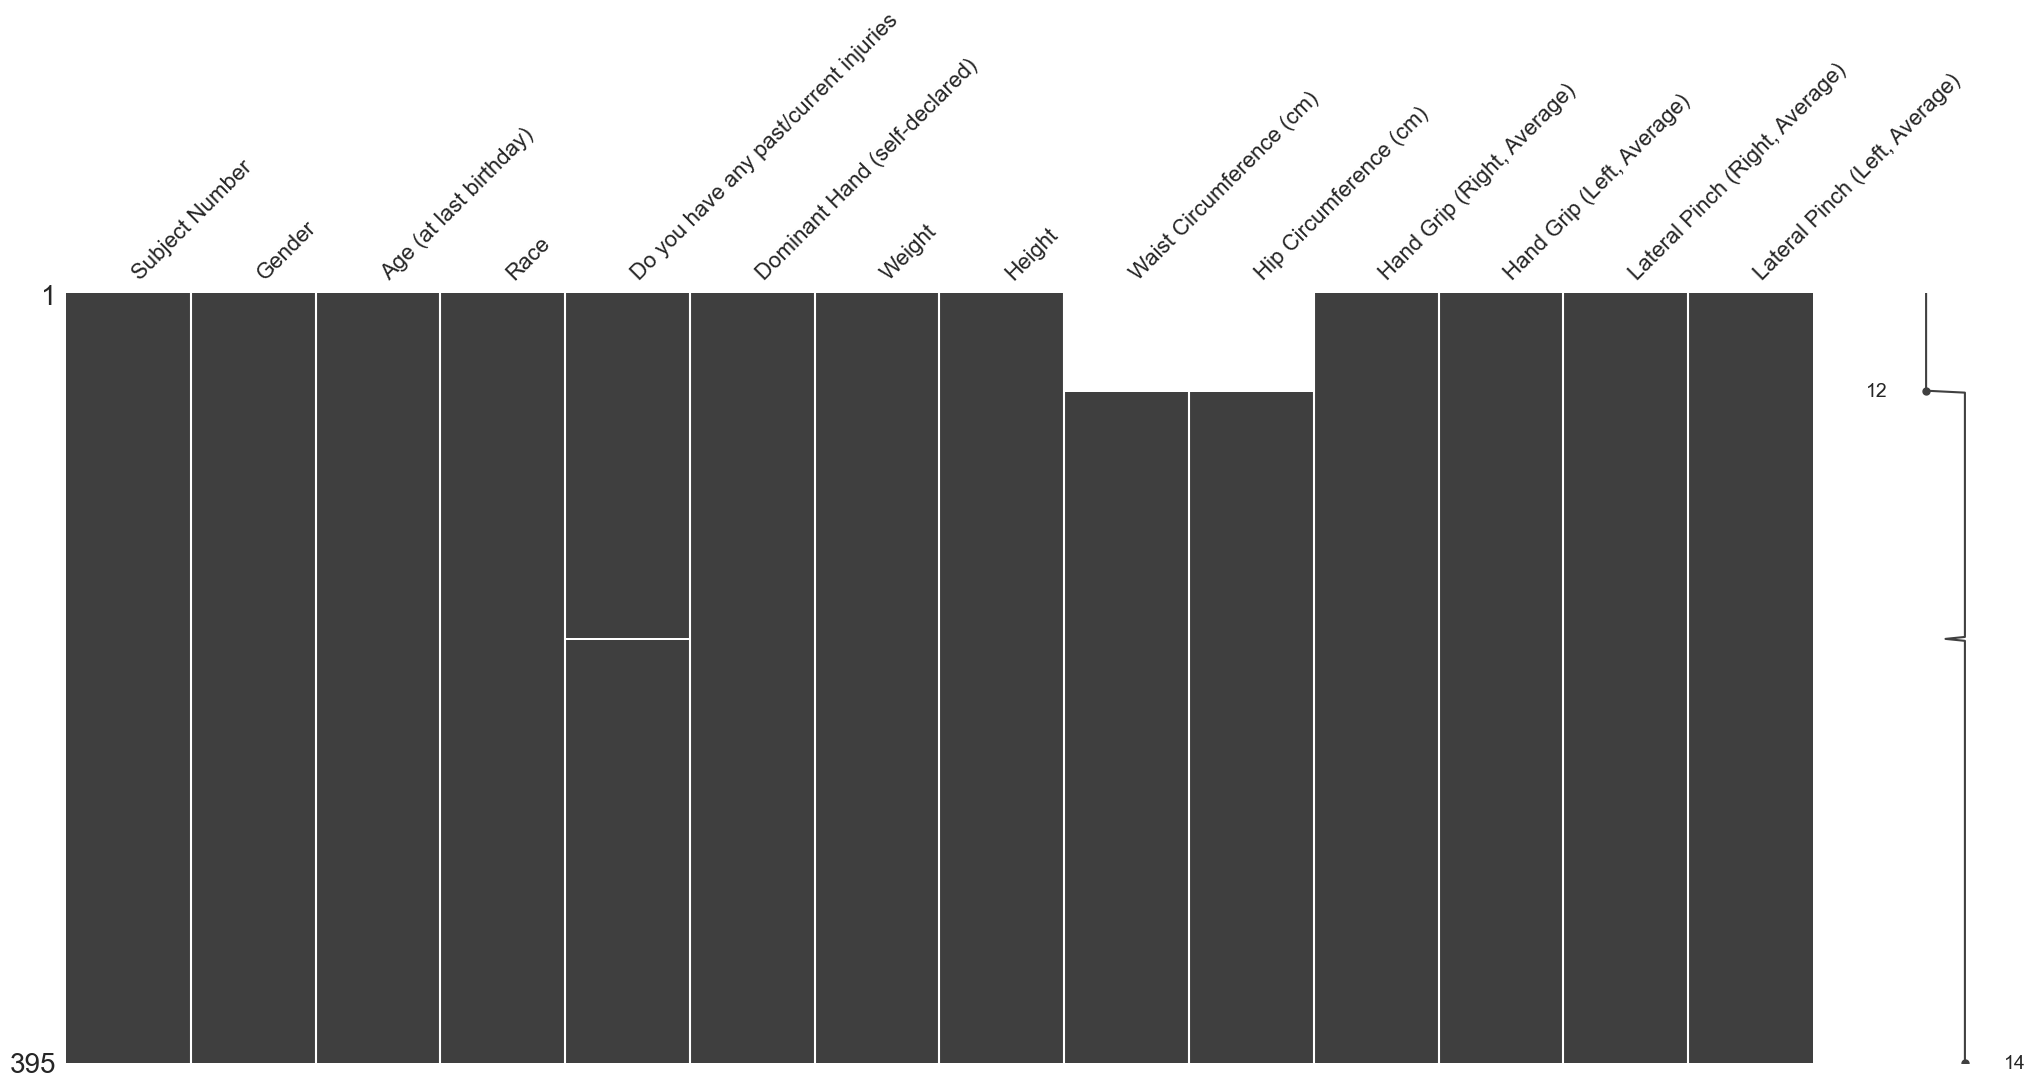

In [53]:
import missingno as msno
msno.matrix(df)

Remove missing data & zero value & "not done" value

In [54]:
df = df.dropna()
#Drop the rows where at least one element is missing.

In [55]:
df = df[(df['Hand Grip (Right, Average)'] != 0)]
df = df[(df['Hand Grip (Left, Average)'] != 0)]
df = df[(df['Hand Grip (Right, Average)'] != "not done")]
df = df[(df['Hand Grip (Left, Average)'] != "not done")]


##### Data treatment

Tranform to numeric

In [56]:
# convert all pinch to numeric
numeric_cols = ['Age (at last birthday)', 'Weight', 'Height', 'Waist Circumference (cm)', 'Hip Circumference (cm)', 
'Hand Grip (Right, Average)', 'Hand Grip (Left, Average)' , 'Lateral Pinch (Right, Average)',  'Lateral Pinch (Left, Average)']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [57]:
df.head()

,Subject Number,Gender,Age (at last birthday),Race,Do you have any past/current injuries,Dominant Hand (self-declared),Weight,Height,Waist Circumference (cm),Hip Circumference (cm),"Hand Grip (Right, Average)","Hand Grip (Left, Average)","Lateral Pinch (Right, Average)","Lateral Pinch (Left, Average)"
51,SN052,Female,22.0,Indian,No,Right,71.2,154.0,82.0,108.3,24.40,25.50,5.10,4.03
52,SN053,Male,24.0,Chinese,R pneumothorax with pleuroclesis done ~5 years...,Right,65.8,170.0,82.5,95.4,36.20,32.30,7.80,7.50
53,SN054,Male,24.0,Chinese,No,Right,64.5,178.0,75.5,94.3,47.20,50.83,8.33,8.33
55,SN056,Male,51.0,Chinese,No,Right,111.9,175.0,126.2,125.5,37.73,35.40,8.73,7.90
56,SN057,Female,34.0,Chinese,"Sprained ankles, moderate scoliosis idiopathic...",Right,48.9,160.0,67.5,92.5,27.23,22.40,5.30,5.90


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 51 to 394
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Subject Number                         340 non-null    object 
 1   Gender                                 340 non-null    object 
 2   Age (at last birthday)                 340 non-null    float64
 3   Race                                   340 non-null    object 
 4   Do you have any past/current injuries  340 non-null    object 
 5   Dominant Hand (self-declared)          340 non-null    object 
 6   Weight                                 340 non-null    float64
 7   Height                                 340 non-null    float64
 8   Waist Circumference (cm)               340 non-null    float64
 9   Hip Circumference (cm)                 340 non-null    float64
 10  Hand Grip (Right, Average)             340 non-null    float64
 11  Hand 

Add age group

In [59]:
age_group = []

for i in df['Age (at last birthday)']:
    if  20<= i and i <=24:
        age_group.append("20-24")
    elif  25<= i and i <=29:
        age_group.append("25-29")  
    elif  30<= i and i <=34:
        age_group.append("30-34")
    elif  35<= i and i <=39:
        age_group.append("35-39")
    elif  40<= i and i <=44:
        age_group.append("40-44")
    elif  45<= i and i <=49:
        age_group.append("45-49")
    elif  50<= i and i <=54:
        age_group.append("50-54")
    elif  55<= i and i <=59:
        age_group.append("55-59")
    elif  60<= i and i <=64:
        age_group.append("60-64")
    elif  65<= i and i <=69:
        age_group.append("65-69")
    elif  70<= i and i <=74:
        age_group.append("70-74")
    elif  75<= i and i <=79:
        age_group.append("75-79")
        
df = df.assign(age_group=age_group)


Decode word information recorded

In [60]:
# rename gender
gendermap = {'Female' : 'Female', 'Female ' : 'Female', 'Female  ':'Female',
            'Male' : 'Male', 'Male ': 'Male', 'male': 'Male'}

df['Gender'] = df['Gender'].map(gendermap)


In [61]:
#check
df['Gender'].value_counts()
#sum(df['Gender'].value_counts())

Female    195
Male      145
Name: Gender, dtype: int64

In [62]:
# rename race
racemap = {'Indian' : 'Indian', 'indian': 'Indian', 'Indian ': 'Indian', 'Indian ': 'Indian',
'Chinese': 'Chinese', 'Chinese ': 'Chinese', 'chinese': 'Chinese', 
'Malay': 'Malay', 'malay': 'Malay', 'Burmese': 'Burmese', 'Eurasian': 'Eurasian', 'Others: Vietnamese': 'Vietnamese'}

df['Race'] = df['Race'].map(racemap)


In [63]:
# race review
df['Race'].value_counts()

#sum(df['Race'].value_counts())

Chinese       309
Indian         18
Malay          10
Eurasian        1
Burmese         1
Vietnamese      1
Name: Race, dtype: int64

In [64]:
# rename dominant hand
handedness = {'Right' : 'Right', 'Left': 'Left', 'Right ': 'Right', 'Left ': 'Left','right': 'Right', 'left': 'Left', 
'Ambidextrous': 'Ambidextrous', 'Ambidextrous (Right hand used for writing)': 'Ambidextrous'}

df['Dominant Hand (self-declared)'] = df['Dominant Hand (self-declared)'].map(handedness)

In [65]:
# dominant hand review
df['Dominant Hand (self-declared)'].value_counts()

#sum(df['Dominant Hand (self-declared)'].value_counts())

Right           307
Left             29
Ambidextrous      4
Name: Dominant Hand (self-declared), dtype: int64

In [66]:
# rename dominant hand
handedness = {'Right' : 'Right', 'Left': 'Left', 'Right ': 'Right', 'Left ': 'Left','right': 'Right', 'left': 'Left', 
'Ambidextrous': 'Ambidextrous', 'Ambidextrous (Right hand used for writing)': 'Ambidextrous'}

df['Dominant Hand (self-declared)'] = df['Dominant Hand (self-declared)'].map(handedness)

In [67]:
print(df['Do you have any past/current injuries'].value_counts().to_string())

No                                                                                                                                                                                                                                                    247
No.                                                                                                                                                                                                                                                     5
Yes                                                                                                                                                                                                                                                     3
no                                                                                                                                                                                                                                                      2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 51 to 394
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Subject Number                         340 non-null    object 
 1   Gender                                 340 non-null    object 
 2   Age (at last birthday)                 340 non-null    float64
 3   Race                                   340 non-null    object 
 4   Do you have any past/current injuries  340 non-null    object 
 5   Dominant Hand (self-declared)          340 non-null    object 
 6   Weight                                 340 non-null    float64
 7   Height                                 340 non-null    float64
 8   Waist Circumference (cm)               340 non-null    float64
 9   Hip Circumference (cm)                 340 non-null    float64
 10  Hand Grip (Right, Average)             340 non-null    float64
 11  Hand 

### 2. Data Visualization

visualize data cross-relationship

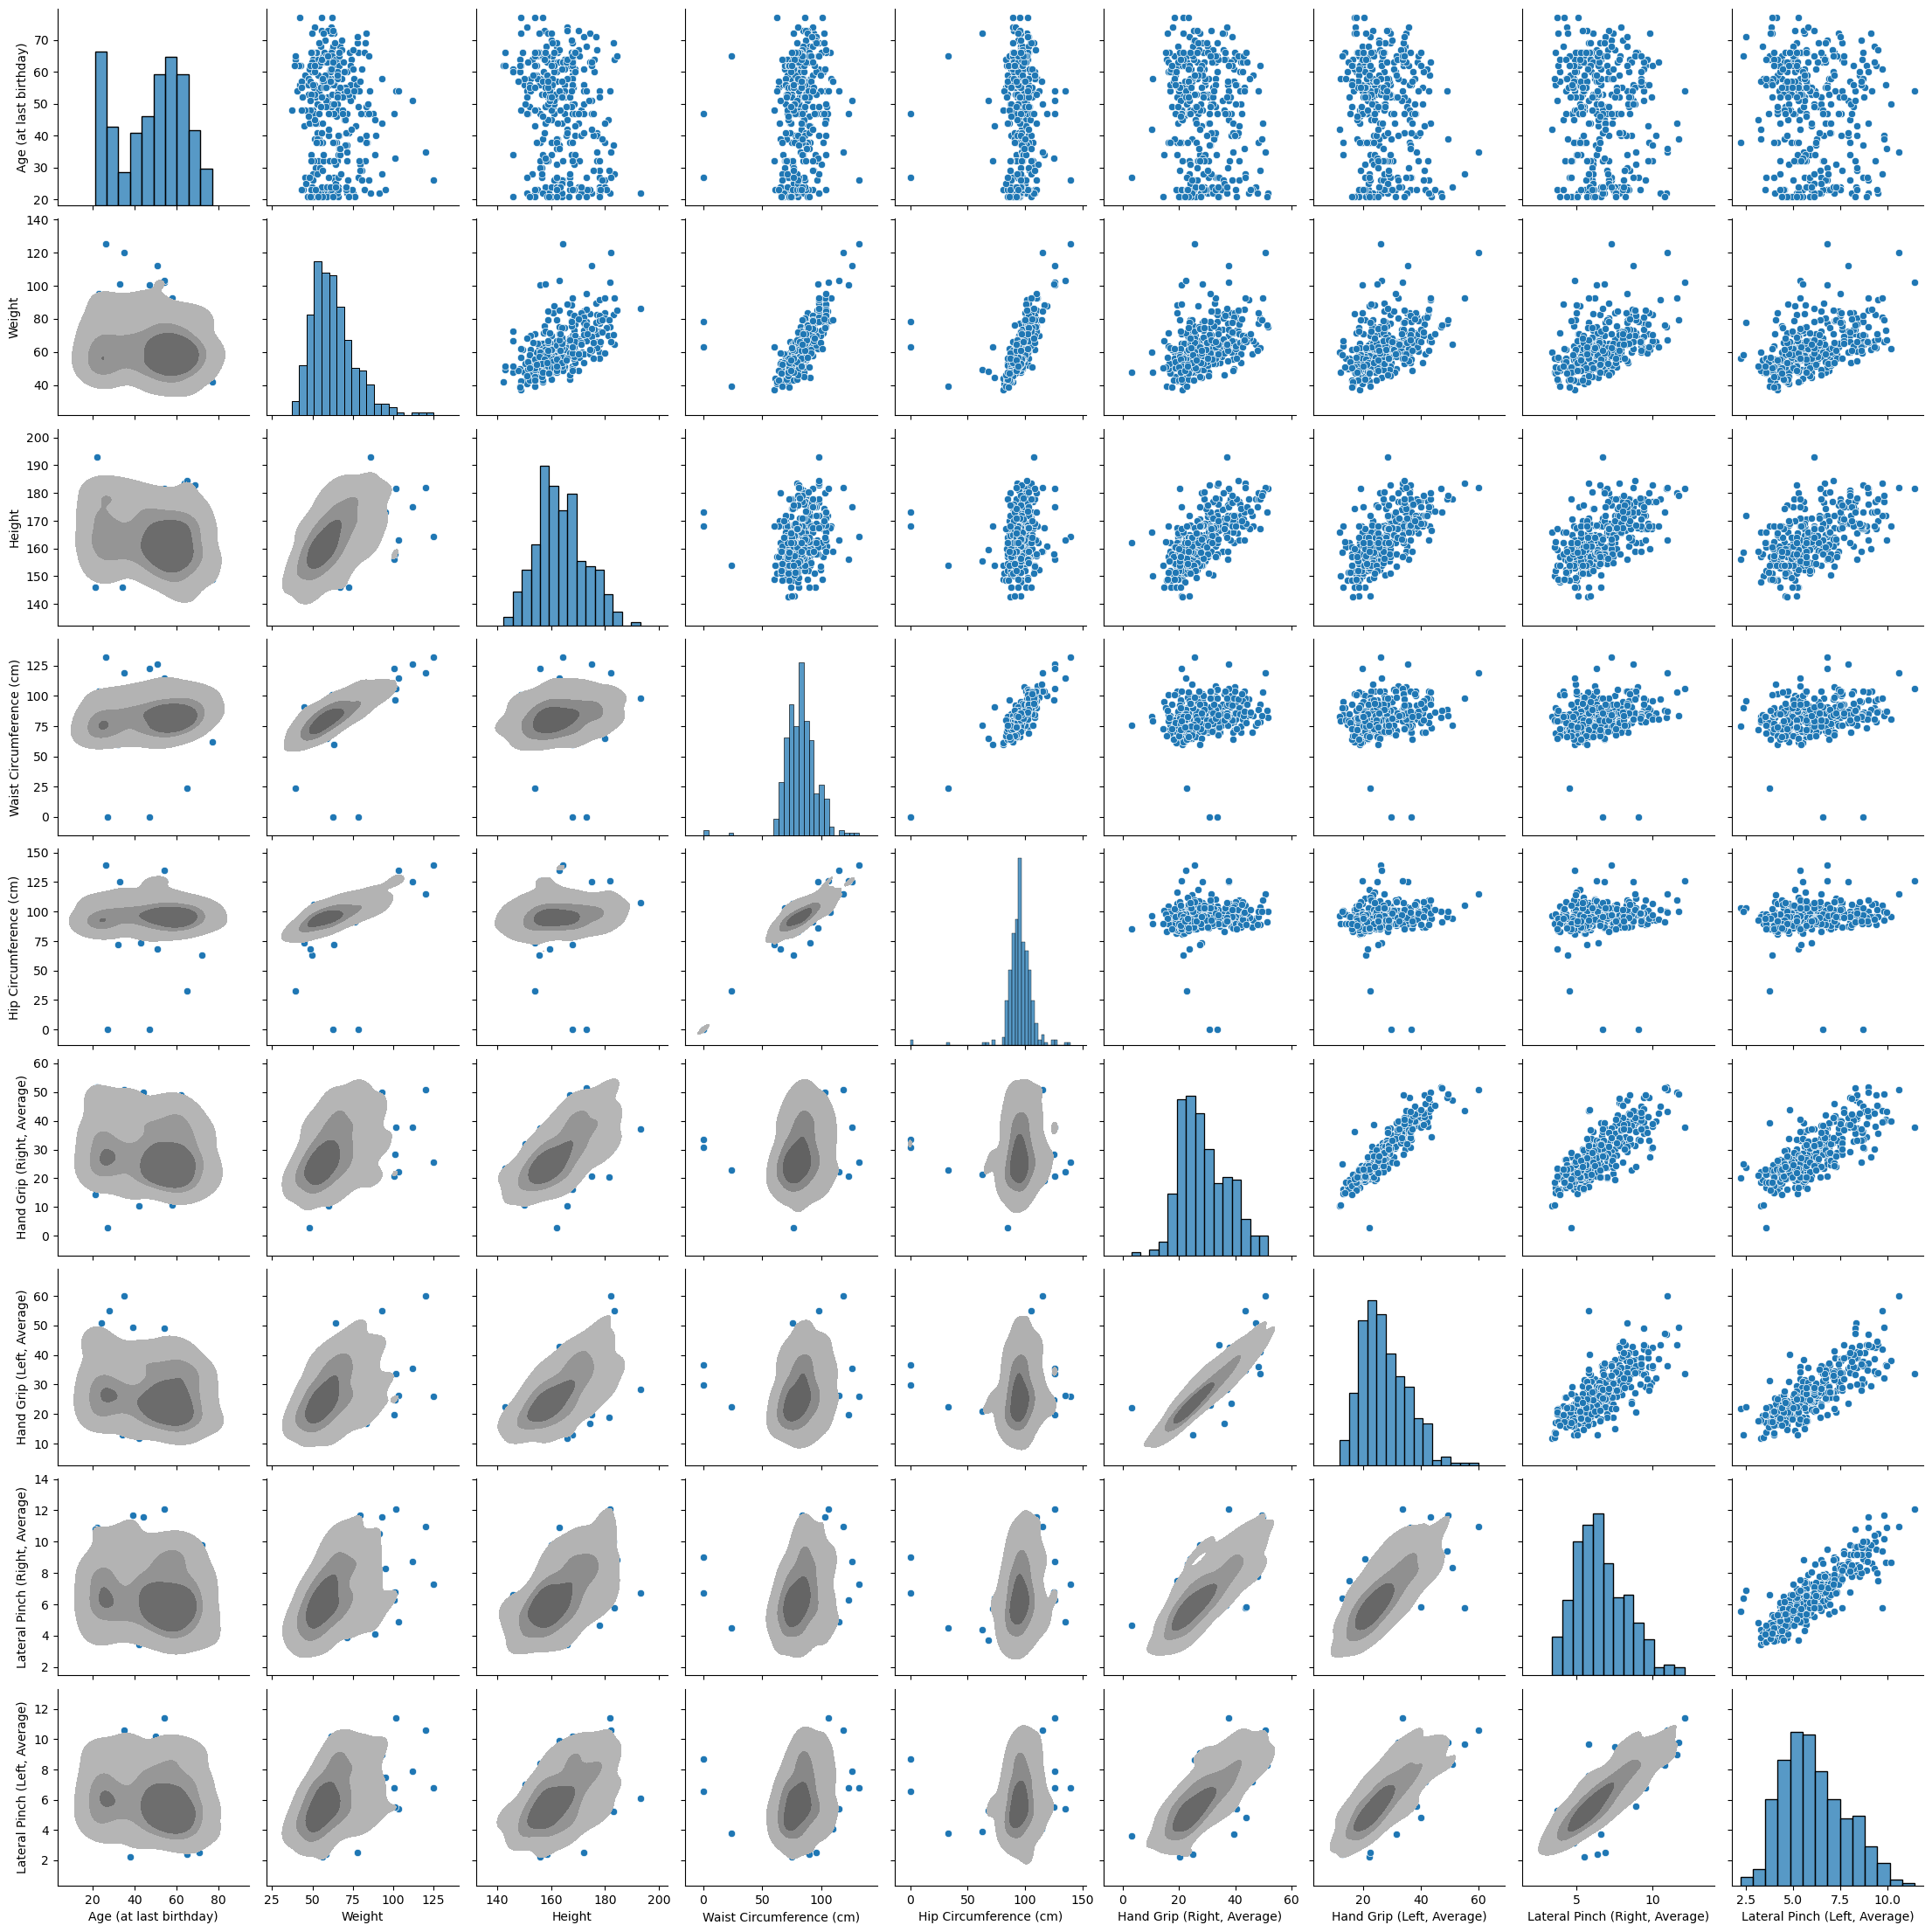

In [69]:
sns.reset_defaults()
g = sns.pairplot(df)
g.map_lower(sns.kdeplot, levels=4, color=".2", fill=True)

In [70]:
#plot color scaled correlation matrix
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')
# we can see that weight & height is highly correlated to pinch & grip

,Age (at last birthday),Weight,Height,Waist Circumference (cm),Hip Circumference (cm),"Hand Grip (Right, Average)","Hand Grip (Left, Average)","Lateral Pinch (Right, Average)","Lateral Pinch (Left, Average)"
Age (at last birthday),1.000000,-0.107826,-0.247105,0.165517,0.009222,-0.141075,-0.174484,-0.107939,-0.133450
Weight,-0.107826,1.000000,0.572363,0.709752,0.578712,0.462637,0.489930,0.499762,0.483933
Height,-0.247105,0.572363,1.000000,0.242603,0.130498,0.675511,0.654562,0.593607,0.556870
Waist Circumference (cm),0.165517,0.709752,0.242603,1.000000,0.845127,0.192553,0.205618,0.255321,0.245462
Hip Circumference (cm),0.009222,0.578712,0.130498,0.845127,1.000000,0.086980,0.094548,0.143371,0.132473
"Hand Grip (Right, Average)",-0.141075,0.462637,0.675511,0.192553,0.086980,1.000000,0.915393,0.800910,0.774088
"Hand Grip (Left, Average)",-0.174484,0.489930,0.654562,0.205618,0.094548,0.915393,1.000000,0.760226,0.804121
"Lateral Pinch (Right, Average)",-0.107939,0.499762,0.593607,0.255321,0.143371,0.800910,0.760226,1.000000,0.858310
"Lateral Pinch (Left, Average)",-0.133450,0.483933,0.556870,0.245462,0.132473,0.774088,0.804121,0.858310,1.000000


In [71]:
#rename columns
df.columns = ['Subject_Number', 'Gender', 'Age', 'Race', 'Injuries',  'Hand_Dominance', 'Weight', 'Height', 
'Waist_Circumference_(cm)', 'Hip_Circumference_(cm)',  'RH_Grip', 'LH_Grip', 'RH_Pinch', 'LH_Pinch', 'Age_Group']

In [72]:
#distribution
# df.hist(bins=50, figsize=(20, 15))
# plt.savefig('numeric_attributes.png')
# plt.show()

In [73]:
# # libraries & dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
 
# # set seaborn style
# sns.set_style("white")

# # Basic 2D density plot
# sns.kdeplot(x=df.Weight, y=df.Height)
# plt.show()
 
# # Custom the color, add shade and bandwidth
# sns.kdeplot(x=df.Weight, y=df.Height, cmap="Reds", shade=True, bw_adjust=.5)
# plt.show()

# # Add thresh parameter
# sns.kdeplot(x=df.Weight, y=df.Height, cmap="Blues", shade=True, thresh=0)
# plt.show()

In [74]:
df_melt = df.melt(id_vars=['Subject_Number','Hand_Dominance','Gender'], value_vars=['RH_Grip', 'LH_Grip'], var_name='Hand', value_name='Grip_Strength')
df_melt.head()

,Subject_Number,Hand_Dominance,Gender,Hand,Grip_Strength
0,SN052,Right,Female,RH_Grip,24.40
1,SN053,Right,Male,RH_Grip,36.20
2,SN054,Right,Male,RH_Grip,47.20
3,SN056,Right,Male,RH_Grip,37.73
4,SN057,Right,Female,RH_Grip,27.23


In [117]:
df_melt["Hand_Dominance"].value_counts()

Right           614
Left             58
Ambidextrous      8
Name: Hand_Dominance, dtype: int64

AttributeError: 'list' object has no attribute 'get_xaxis_transform'

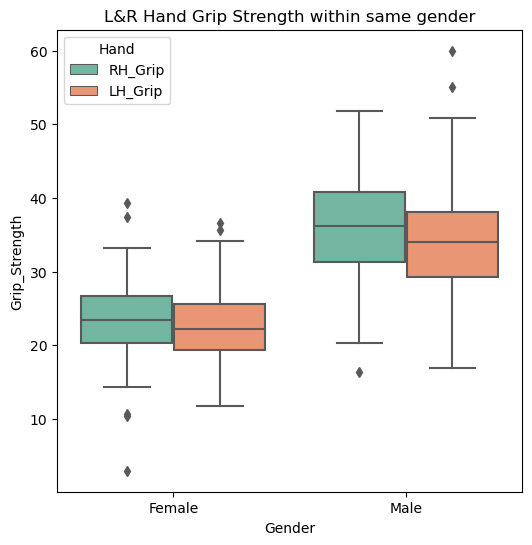

In [120]:
# Left & Right Hand Grip Strength within same gender
sns.set_palette("Set2")


x = "Gender"
y = "Grip_Strength"
order = ["Female", "Male"]
hue = "Hand"
hue_order=["RH_Grip", "LH_Grip"]


plt.figure(figsize=(6, 6), dpi=100)
ax = sns.boxplot(data=df_melt, x=x, y=y, order=order, hue=hue, hue_order=hue_order).set(title='L&R Hand Grip Strength within same gender')
#sns.stripplot(y="Grip_Strength", x="Gender", hue="Hand", data=df_melt, alpha=0.4, jitter=True, marker='o')

pairs=[(("Female", "RH_Grip"), ("Male", "LH_Grip"))]
# https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb
annot = Annotator(ax, pairs, data=df_melt, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

E_Ideal vs. E_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:1.560e-31 U_stat=3.756e+06
I_Ideal vs. I_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:5.141e-61 U_stat=1.009e+06
J_Ideal vs. J_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:4.018e-37 U_stat=2.337e+05
E_Ideal vs. E_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:5.201e-19 U_stat=1.480e+06
I_Ideal vs. I_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:5.008e-13 U_stat=4.359e+05
J_Ideal vs. J_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:1.006e-04 U_stat=1.174e+05
E_Ideal vs. E_Very Good: Mann-Whitney-Wilcoxon test two-sided, P_val:1.736e-02 U_stat=4.850e+06
E_Good vs. I_Ideal: Mann-Whitney-Wilcoxon test two-sided, P_val:5.906e-01 U_stat=9.882e+05
I_Premium vs. J_Ideal: Mann-Whitney-Wilcoxon test two-sided, P_val:5.159e-27 

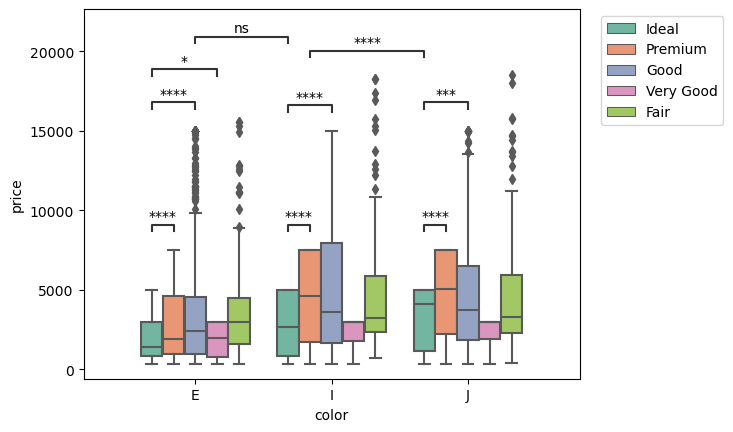

In [113]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
order = ["E", "I", "J"]
pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal"))
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

In [114]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [123]:
df["color"].value_counts()

E    9797
I    5422
J    2808
D       0
F       0
G       0
H       0
Name: color, dtype: int64

In [87]:
df_F = df[df["Gender"]=="Female"]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Right vs. Left: Mann-Whitney-Wilcoxon test two-sided, P_val:3.497e-01 U_stat=1.282e+03
Left vs. Ambidextrous: Mann-Whitney-Wilcoxon test two-sided, P_val:4.271e-01 U_stat=3.350e+01
Right vs. Ambidextrous: Mann-Whitney-Wilcoxon test two-sided, P_val:6.031e-01 U_stat=3.090e+02


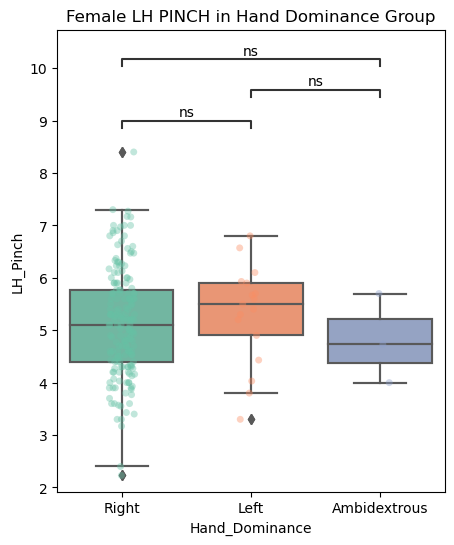

In [94]:
# Female only, by hand dominance
sns.set_palette("Set2")

plt.figure(figsize=(5, 6), dpi=100)
sns.boxplot(y="LH_Pinch", x="Hand_Dominance", data=df_F).set(title='Female LH PINCH in Hand Dominance Group')
sns.stripplot(y="LH_Pinch", x="Hand_Dominance", data=df_F, alpha=0.4, jitter=True, marker='o')


x = "Hand_Dominance"
y = "LH_Pinch"
ax = sns.boxplot(data=df_F, x=x, y=y)
annot = Annotator(ax, [("Right", "Left"), ("Right", "Ambidextrous"), ("Left", "Ambidextrous")], data=df_F, x=x, y=y)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

In [33]:
df_righthanded = df[df['Hand_Dominance'] == 'Right']
df_righthanded.head()

,Subject_Number,Gender,Age,Race,Injuries,Hand_Dominance,Weight,Height,Waist_Circumference_(cm),Hip_Circumference_(cm),RH_Grip,LH_Grip,RH_Pinch,LH_Pinch,Age_Group
51,SN052,Female,22.0,Indian,No,Right,71.2,154.0,82.0,108.3,24.40,25.50,5.10,4.03,20-24
52,SN053,Male,24.0,Chinese,R pneumothorax with pleuroclesis done ~5 years...,Right,65.8,170.0,82.5,95.4,36.20,32.30,7.80,7.50,20-24
53,SN054,Male,24.0,Chinese,No,Right,64.5,178.0,75.5,94.3,47.20,50.83,8.33,8.33,20-24
55,SN056,Male,51.0,Chinese,No,Right,111.9,175.0,126.2,125.5,37.73,35.40,8.73,7.90,50-54
56,SN057,Female,34.0,Chinese,"Sprained ankles, moderate scoliosis idiopathic...",Right,48.9,160.0,67.5,92.5,27.23,22.40,5.30,5.90,30-34


c:\Users\lijing.soh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


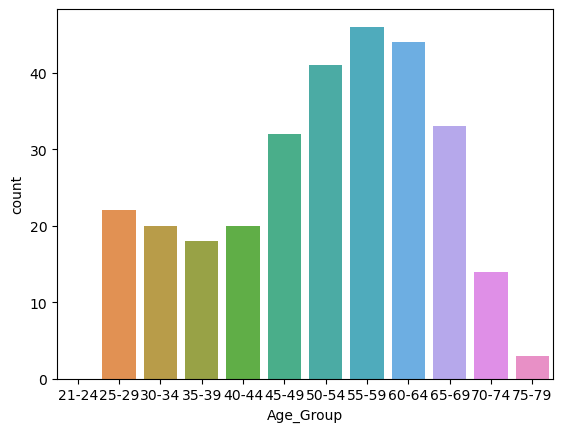

In [34]:
sns.set_palette("Set1")
# age distribution
sns.countplot(df['Age_Group'], order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']);

In [39]:
df['Gender'].value_counts()


Female    195
Male      145
Name: Gender, dtype: int64

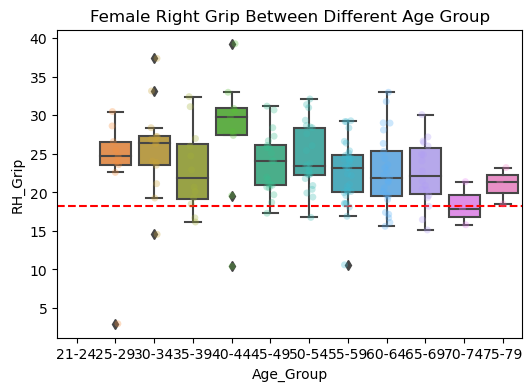

In [46]:
# https://www.researchgate.net/publication/276498373_Optimal_Cutoffs_of_Grip_Strength_for_Definition_as_Weakness_in_the_Elderly
# In man, grip strength is lower than 32.45 kg, the strength is weaker
# In women, grip strength is lower than 18.20 kg, the strength is weaker

# Female Right Grip
plt.figure(figsize=(6, 4), dpi=100)
sns.boxplot(x="Age_Group", y="RH_Grip", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_F).set(title='Female Right Grip Between Different Age Group')

sns.stripplot(x="Age_Group", y="RH_Grip", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_F, alpha=0.3, jitter=True, marker='o')

plt.axhline(y=18.20, c='red', linestyle='dashed', label="cut-off")

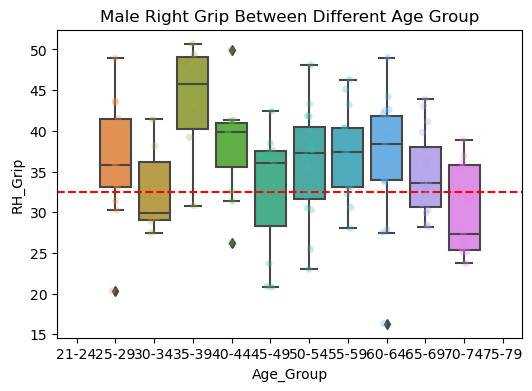

In [47]:
# Male Right Grip
plt.figure(figsize=(6, 4), dpi=100)
sns.boxplot(x="Age_Group", y="RH_Grip", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_M).set(title='Male Right Grip Between Different Age Group')

sns.stripplot(x="Age_Group", y="RH_Grip", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_M, alpha=0.3, jitter=True, marker='o')

plt.axhline(y=32.45, c='red', linestyle='dashed')

<AxesSubplot:xlabel='Weight', ylabel='RH_Pinch'>

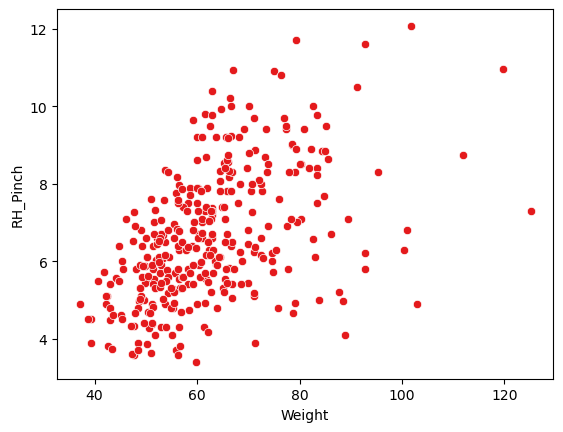

In [37]:
sns.scatterplot(x="Weight", y="RH_Pinch", data=df)

### 3. Regression Analysis

Before we conduct linear regression, we must first make sure that four assumptions are met:

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed. (Only predicted error needs to be normally distributed, not applicable for dependent & non-dependent var.)

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading.

In [38]:
df_lanalysis = df.copy()

In [39]:
df_lanalysis.head()

,Subject_Number,Gender,Age,Race,Injuries,Hand_Dominance,Weight,Height,Waist_Circumference_(cm),Hip_Circumference_(cm),RH_Grip,LH_Grip,RH_Pinch,LH_Pinch,Age_Group
51,SN052,Female,22.0,Indian,No,Right,71.2,154.0,82.0,108.3,24.40,25.50,5.10,4.03,20-24
52,SN053,Male,24.0,Chinese,R pneumothorax with pleuroclesis done ~5 years...,Right,65.8,170.0,82.5,95.4,36.20,32.30,7.80,7.50,20-24
53,SN054,Male,24.0,Chinese,No,Right,64.5,178.0,75.5,94.3,47.20,50.83,8.33,8.33,20-24
55,SN056,Male,51.0,Chinese,No,Right,111.9,175.0,126.2,125.5,37.73,35.40,8.73,7.90,50-54
56,SN057,Female,34.0,Chinese,"Sprained ankles, moderate scoliosis idiopathic...",Right,48.9,160.0,67.5,92.5,27.23,22.40,5.30,5.90,30-34


In [40]:
df_lanalysis['Hand_Dominance'] = df_lanalysis['Hand_Dominance'].map({'Right':0, 'Left': 1, 'Ambidextrous': 2})

In [41]:
df_lanalysis['Gender'] = df_lanalysis['Gender'].map({'Male': 0, 'Female':1})

In [40]:
#BMI
df_lanalysis = df_lanalysis.assign(BMI=(df_lanalysis['Height']/100)*(df_lanalysis['Height']/100)/df_lanalysis['Weight'])

In [41]:
# pinch divided by BMI (normalized)
df_lanalysis = df_lanalysis.assign(pinch_per_BMI=(df_lanalysis['RH_Pinch']/df_lanalysis['BMI']))

<AxesSubplot:title={'center':'Normalized Right Lateral Pinch Between Different Age Group'}, xlabel='Age_Group', ylabel='pinch_per_BMI'>

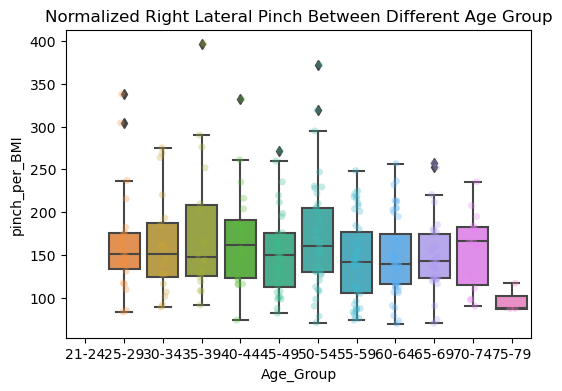

In [43]:
plt.figure(figsize=(6, 4), dpi=100)
sns.boxplot(x="Age_Group", y="pinch_per_BMI", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_lanalysis).set(title='Normalized Right Lateral Pinch Between Different Age Group')

sns.stripplot(x="Age_Group", y="pinch_per_BMI", order=['21-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54',
                                                                     '55-59', '60-64', '65-69', '70-74', '75-79'],
            data=df_lanalysis, alpha=0.3, jitter=True, marker='o')

In [43]:
df_lanalysis = df_lanalysis[df_lanalysis['Weight']<=89.5]
df_lanalysis = df_lanalysis[df_lanalysis['Weight']>=39.5]

In [44]:
# https://www.datascienceconcepts.com/tutorials/python-programming-language/linear-regression-analysis-of-variance-anova-table-in-python/#:~:text=Linear%20Regression%3A%20Analysis%20of%20Variance%20ANOVA%20Table%20in,explained%20variance%20and%20residual%20variance%20or%20unexplained%20variance.

import statsmodels.api as sm
import statsmodels.formula.api as smf
 
mlr = smf.ols(formula="RH_Pinch ~ Gender + Weight + Hand_Dominance", data=df_lanalysis).fit()

print(mlr.summary())
# Note: acceptable skewness range: -3 to 3

                            OLS Regression Results                            
Dep. Variable:               RH_Pinch   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     110.0
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           5.69e-49
Time:                        09:44:57   Log-Likelihood:                -506.43
No. Observations:                 324   AIC:                             1021.
Df Residuals:                     320   BIC:                             1036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8018      0.473     12.

<AxesSubplot:>

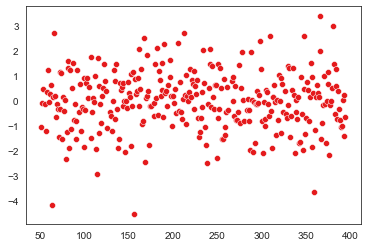

In [45]:
# check models' residuals homoscedasticity
sns.scatterplot(data=mlr.resid)

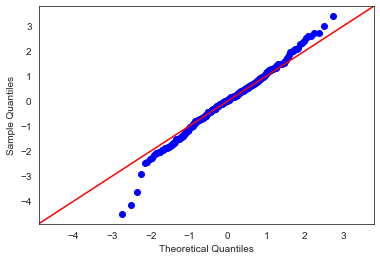

In [46]:
# check models' residuals normality [1]
sm.qqplot(data=mlr.resid, line ='45');

# this is a Non-normal distribution QQ-plot

How toe fix the normality issue:
Usually, there are 2 reasons why this issue(error does not follow a normal distribution) would occur:

- Dependent or independent variables are too non-normal(can see from skewness or kurtosis of the variable)

- Existence of a few outliers/extreme values which disrupt the model prediction

<AxesSubplot:ylabel='Count'>

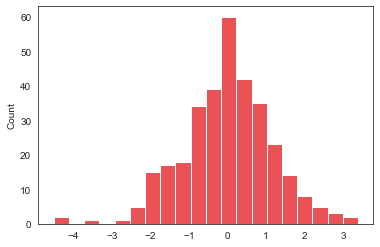

In [47]:
# check models' residuals normality [2]

sns.histplot(mlr.resid)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

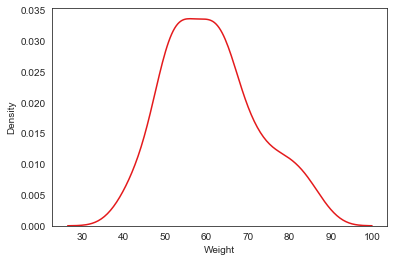

In [48]:

df[df['Weight'] <= 100]

sns.kdeplot(x='Weight', data=df[df['Weight'] <= 89.5])

In [49]:
print (stats.shapiro(df['Weight']))
#(statistic=0.9372456073760986, pvalue=7.427570364315628e-11)- H0 rejected - not normal.
# The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population.#

NameError: name 'stats' is not defined

In [ ]:
#transform the data using box-cox
weight_transformed, lambd = stats.boxcox(df['Weight'])
#plot the distribution curve and QQ-plot for transformed data
sns.distplot(df[df['Weight'] <= 89.5]['Weight'])
plt.show()
fig = sm.qqplot(df[df['Weight'] <= 89.5]['Weight'],line='s')
plt.show()